# 一、基本数据处理方法

In [2]:
import torch
import numpy as np

In [3]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [4]:
x.shape

torch.Size([12])

In [5]:
x.numel()

12

In [6]:
x = x.reshape(3,4)
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [7]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [8]:
torch.tensor([[[2,1,4,3],[1,2,3,4],[4,3,2,1]]]).shape

torch.Size([1, 3, 4])

In [9]:
x = torch.tensor([1.0,2,4,8])
y = torch.tensor([2,2,2,2])
x + y , x - y , x * y , x / y , x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [10]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [11]:
x = torch.arange(12, dtype=torch.float32).reshape((3,4))
y = torch.tensor([[2.0,1,4,3],[1,2,3,4],[4,3,2,1]])
torch.cat((x,y), dim=0), torch.cat((x,y), dim=1) 

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [12]:
x == y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [13]:
x.sum()

tensor(66.)

**广播机制**进行按照元素操作（维度需要相同）

In [14]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a, b, a + b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]),
 tensor([[0, 1],
         [1, 2],
         [2, 3]]))

In [15]:
x[-1] , x[1:3] 

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [16]:
x[1,2] = 9
x

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [17]:
x[0:2, :]=12
x

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [18]:
before = id(y)
y = y + x
id(y) == before

False

In [19]:
z = torch.zeros_like(y)
print("id(z):", id(z))
z[:] = y + x
print("id(z):", id(z))

id(z): 1899405549328
id(z): 1899405549328


In [20]:
A = x.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [21]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

# 二、数据预处理

In [22]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')
    f.write('NA,Pave,127500\n')
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [23]:
import pandas as pd
data = pd.read_csv(data_file)
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


In [24]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:,2]
inputs = pd.get_dummies(inputs, dummy_na=True,dtype= int)
inputs
inputs = inputs.fillna(inputs.mean())
inputs

,NumRooms,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


In [25]:
x,y = torch.tensor(inputs.values), torch.tensor(outputs.values)
x, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

In [26]:
A = torch.arange(20).reshape(5,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [27]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [28]:
A = torch.arange(20,dtype=torch.float32).reshape(5,4)
B = A.clone()
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [29]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [30]:
torch.norm(torch.ones((4,9)))

tensor(6.)

按特定轴求和

In [31]:
import torch

In [32]:
a = torch.ones((2,5,4))
a.shape

torch.Size([2, 5, 4])

In [33]:
a.sum(axis=[0,2]).shape
a.sum(axis=[0,2])

tensor([8., 8., 8., 8., 8.])

In [34]:
a.sum(axis = 1,keepdim=True).shape

torch.Size([2, 1, 4])

In [35]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [36]:
x.requires_grad_(True)
x.grad

In [37]:
y = 2 * torch.dot(x, x)
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [38]:
x.grad == 4 * x

tensor([True, True, True, True])

In [39]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [40]:
x.grad.zero_()
y = x*x
u = y.detach()
z =u*x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [41]:
x.grad.zero_()
y.sum().backward()
x.grad == 2*x

tensor([True, True, True, True])

In [42]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()
a.grad == d / a

tensor(True)

线性回归

三个因素 $x_1,x_2,x_3$,$y = w_1 * x_1 + w_2 * x_2 + w_3 *x_3 +b$

# 线性回归从零开始实现

In [43]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [44]:
def synthetic_data(w, b, num_examples):
    """生成y = Xw + b + 噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))
true_w = torch.tensor([2, -3.4])
true_b = 4.2
feature, label = synthetic_data(true_w, true_b, 1000)

In [45]:
print('features:', feature[0],'\nlabel:', label[0])

features: tensor([-0.4613, -0.4213]) 
label: tensor([4.7235])


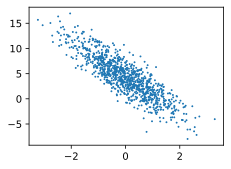

In [46]:
d2l.set_figsize()
d2l.plt.scatter(feature[:, 1].detach().numpy(), label.detach().numpy(), 1);

In [47]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
batch_size = 10
for X, y in data_iter(batch_size, feature, label):
    print(X, '\n', y)
    break

tensor([[-0.4313,  0.4869],
        [-0.3815,  0.0380],
        [ 0.1912, -0.4644],
        [ 0.2665,  1.8017],
        [ 1.4651,  1.3257],
        [ 1.0386,  1.3582],
        [-0.0878,  0.6248],
        [ 0.3882, -0.2035],
        [-0.9778,  0.0579],
        [-0.9107,  0.6938]]) 
 tensor([[ 1.6966],
        [ 3.3078],
        [ 6.1521],
        [-1.4001],
        [ 2.6364],
        [ 1.6570],
        [ 1.8936],
        [ 5.6609],
        [ 2.0566],
        [ 0.0098]])


In [48]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [49]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [50]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [51]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [52]:
lr = 0.3
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, feature, label):
        l = loss(net(X, w, b), y)  # 计算损失值
        l.sum().backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数
    with torch.no_grad():
        train_l = loss(net(feature, w, b), label)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000053
epoch 2, loss 0.000056
epoch 3, loss 0.000053
epoch 4, loss 0.000054
epoch 5, loss 0.000054
epoch 6, loss 0.000060
epoch 7, loss 0.000059
epoch 8, loss 0.000054
epoch 9, loss 0.000059
epoch 10, loss 0.000055


In [53]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([0.0011, 0.0012], grad_fn=<SubBackward0>)
b的估计误差: tensor([-0.0005], grad_fn=<RsubBackward1>)


# 线性回归简洁实现

In [54]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
feature, label = synthetic_data(true_w, true_b, 1000)

In [55]:
def load_array(data_arrays, batch_size, is_train=True):
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((feature, label), batch_size)

next(iter(data_iter))

[tensor([[-0.0159,  1.0902],
         [-0.6934,  1.1373],
         [-0.2042, -0.5448],
         [ 0.3312, -0.0695],
         [ 0.1475, -0.8393],
         [ 0.1994,  0.6500],
         [ 0.2851, -1.7576],
         [ 1.0789, -0.3157],
         [ 0.7250, -0.7345],
         [-0.4579, -0.1245]]),
 tensor([[ 0.4422],
         [-1.0441],
         [ 5.6289],
         [ 5.0903],
         [ 7.3569],
         [ 2.3884],
         [10.7630],
         [ 7.4365],
         [ 8.1349],
         [ 3.7148]])]

In [56]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))

In [57]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [58]:
loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [59]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(feature), label)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000249
epoch 2, loss 0.000103
epoch 3, loss 0.000103


# softmax回归

回归：估计一个连续值；分类预测一个离散类别

l2 loss :$l(y,y')=\frac{1}{2}(y-y')^2$

l1 loss :$l(y,y')=|y-y'|$

Huber's Robust loss 

In [61]:
import torchvision
from torchvision import transforms
d2l.use_svg_display()

In [64]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="../data", train=True, 
                                                transform=trans,download=False)
mnist_test = torchvision.datasets.FashionMNIST(root="../data", train=False,transform=trans,download=False)
len(mnist_train), len(mnist_test)

RuntimeError: Dataset not found. You can use download=True to download it

In [68]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="../data", train=False, transform=trans, download=True)
print(len(mnist_train), len(mnist_test))

60000 10000


In [70]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [72]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]
def show_image(img, num_rows, num_cols, titles=None, scale=1.5):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, img)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

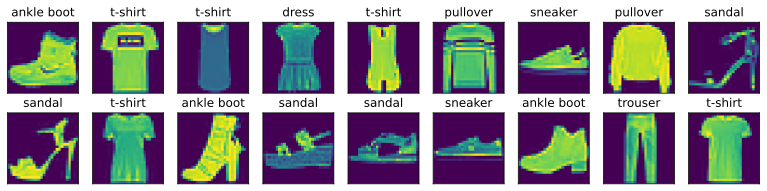

In [73]:
x,y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_image(x.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));